In [1]:
import numpy as np
import tensorflow as tf

# Load Dataset

In [2]:
def load_mnist():
        
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    assert x_train.shape == (60000, 28, 28)
    assert x_test.shape == (10000, 28, 28)
    assert y_train.shape == (60000,)
    assert y_test.shape == (10000,)

    # normalize
    x_train = x_train.reshape(60000, -1).astype(np.float32) / 255.
    x_test = x_test.reshape(10000, -1).astype(np.float32) / 255.

    # to one-hot
    y_train = tf.one_hot(y_train, 10, 1., 0.).numpy()
    y_test = tf.one_hot(y_test, 10, 1., 0.).numpy()

    return x_train, x_test, y_train, y_test


def load_fashion_mnist():
        
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    assert x_train.shape == (60000, 28, 28)
    assert x_test.shape == (10000, 28, 28)
    assert y_train.shape == (60000,)
    assert y_test.shape == (10000,)

    # normalize
    x_train = x_train.reshape(60000, -1).astype(np.float32) / 255.
    x_test = x_test.reshape(10000, -1).astype(np.float32) / 255.

    # to one-hot
    y_train = tf.one_hot(y_train, 10, 1., 0.).numpy()
    y_test = tf.one_hot(y_test, 10, 1., 0.).numpy()

    return x_train, x_test, y_train, y_test

def load_cifar10():
        
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    assert x_train.shape == (50000, 32, 32, 3)
    assert x_test.shape == (10000, 32, 32, 3)

    print(y_train.shape)
    assert y_train.shape == (50000,1)
    assert y_test.shape == (10000,1)

    # normalize
    x_train = x_train.reshape(50000, -1).astype(np.float32) / 255.
    x_test = x_test.reshape(10000, -1).astype(np.float32) / 255.

    # to one-hot
    y_train = tf.one_hot(y_train[:, 0], 10, 1., 0.).numpy()
    y_test = tf.one_hot(y_test[:, 0], 10, 1., 0.).numpy()

    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = load_mnist()


# Define neural network inputnoutput
input_size = x_train.shape[1]
output_size = y_train.shape[1]

print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


# Experimento FP32

In [ ]:
# this is just for working with notebooks and classes outside the scope
# import importlib
# import NeuralNetwork
# import Activations
# importlib.reload(NeuralNetwork)
# importlib.reload(Activations)
# NeuralNetwork = NeuralNetwork.NeuralNetwork
########################################################################

import NeuralNetwork
NeuralNetwork = NeuralNetwork.NeuralNetwork


# Create and train the neural network
neural_network = NeuralNetwork(input_size, output_size)

In [ ]:
neural_network.train(x_train, y_train, learning_rate=0.001, num_epochs=10, batch_size=64)

# Make predictions on the test set
y_pred = neural_network.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100}%")

# Teste de normalização de pesos e ativações durante treinamento

In [ ]:
# this is just for working with notebooks and classes outside the scope
import importlib
import NeuralNetwork
import Activations
import FullyConnectedLayer
importlib.reload(NeuralNetwork)
importlib.reload(Activations)
importlib.reload(FullyConnectedLayer)
NeuralNetworkWithScale = NeuralNetwork.NeuralNetworkWithScale
########################################################################

NeuralNetworkWithScale = NeuralNetwork.NeuralNetworkWithScale

# Create and train the neural network
neural_network_with_scale = NeuralNetworkWithScale(input_size, output_size)

### Loop de treinamento aqui

In [ ]:
neural_network_with_scale.train(x_train, y_train, learning_rate=0.001, num_epochs=10, batch_size=64)

# Make predictions on the test set
y_pred = neural_network_with_scale.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100}%")

# Teste de normalização dos erros retropropagados

In [ ]:
# this is just for working with notebooks and classes outside the scope
import importlib
import NeuralNetwork
import Activations
import FullyConnectedLayer
importlib.reload(NeuralNetwork)
importlib.reload(Activations)
importlib.reload(FullyConnectedLayer)
NeuralNetworkWithScale = NeuralNetwork.NeuralNetworkWithScale
########################################################################

NeuralNetworkWithScale = NeuralNetwork.NeuralNetworkWithScale

# Create and train the neural network
neural_network_with_scale = NeuralNetworkWithScale(input_size, output_size)

In [ ]:
# descrever loop de treinamento aqui


inputs = x_train
targets = y_train
learning_rate = 0.001
num_epochs = 10
batch_size = 64



for epoch in range(num_epochs):
    loss = 0.0
    for batch_inputs, y_true in neural_network_with_scale.get_batches(inputs, targets, batch_size):
        
        # Forward pass
        z = neural_network_with_scale.forward(batch_inputs)

        # apply softmax
        y_pred = neural_network_with_scale.softmax.forward(z)

        # Compute loss
        loss += neural_network_with_scale.cross_entropy_loss_with_logits(y_pred, y_true)
        
        # Compute the derivative of the loss
        dz = neural_network_with_scale.cross_entropy_loss_with_logits_derivative(y_pred, y_true)
        

        #####################################
        # backward pass
        grad_output = dz
        

        # normalized gradients
        grad_output_scale = np.max(np.abs(grad_output))               

        # faz essa multiplicação para padronizar operações de retropropagação nas camadas
        grad_output = grad_output * neural_network_with_scale.layers[-1].output_scale / grad_output_scale

        for layer in reversed(neural_network_with_scale.layers):
            if isinstance(layer, FullyConnectedLayer.FullyConnectedLayerWithScale):
                grad_output = layer.backward_with_scale(grad_output, grad_output_scale, learning_rate)
                grad_output_scale = layer.grad_output_scale                

            else:
                grad_output = layer.backward(grad_output, learning_rate)
        #####################################

    loss /= len(inputs)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")


In [ ]:
# Make predictions on the test set
y_pred = neural_network_with_scale.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100}%")

# Teste de quantização dos pesos

In [3]:
# this is just for working with notebooks and classes outside the scope
# import importlib
import NeuralNetwork
import Activations
import FullyConnectedLayer

NeuralNetworkWithScale = NeuralNetwork.QNeuralNetworkWithScale
########################################################################

NeuralNetworkWithScale = NeuralNetwork.QNeuralNetworkWithScale

# Create and train the neural network
neural_network_with_scale = NeuralNetworkWithScale(input_size, output_size)

In [ ]:
# descrever loop de treinamento aqui


inputs = x_train
targets = y_train
learning_rate = 0.001
num_epochs = 1
batch_size = 64



for epoch in range(num_epochs):
    loss = 0.0
    for batch_inputs, y_true in neural_network_with_scale.get_batches(inputs, targets, batch_size):
        print(batch_inputs.shape)
        # Forward pass
        z = neural_network_with_scale.forward(batch_inputs)

        # apply softmax
        y_pred = neural_network_with_scale.softmax.forward(z)

        # Compute loss
        loss += neural_network_with_scale.cross_entropy_loss_with_logits(y_pred, y_true)
        
        # Compute the derivative of the loss
        dz = neural_network_with_scale.cross_entropy_loss_with_logits_derivative(y_pred, y_true)
        

        #####################################
        # backward pass
        grad_output = dz
        

        # normalized gradients
        grad_output_scale = np.max(np.abs(grad_output))        
        
        # faz essa multiplicação para padronizar operações de retropropagação nas camadas
        grad_output = grad_output * neural_network_with_scale.layers[-1].output_scale / grad_output_scale

        for layer in reversed(neural_network_with_scale.layers):
            if isinstance(layer, FullyConnectedLayer.QFullyConnectedLayerWithScale):
                grad_output = layer.backward_with_scale(grad_output, grad_output_scale, learning_rate)
                grad_output_scale = layer.grad_output_scale                

            elif isinstance(layer, Activations.ReLU):                
                grad_output = layer.backward(grad_output, learning_rate)
        #####################################

    loss /= len(inputs)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")


# 

In [7]:
# Make predictions on the test set
y_pred = neural_network_with_scale.predict(x_test[0:1000])

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test[0:1000], axis=1))
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 97.39999999999999%


In [12]:

neural_network_with_scale.forward(x_test[0:1000])

array([[ -1.6736918 ,  -3.48838105,   3.62810622, ...,  17.5478459 ,
         -1.1987313 ,   4.15673931],
       [  1.14171824,  10.97308355,  19.05778925, ...,  -9.43169905,
          2.91813967, -10.59319565],
       [ -6.47477296,  12.56078804,   0.5121307 , ...,   3.33970724,
          0.56147557,  -3.34359108],
       ...,
       [ 30.54542554,  -2.93524365,   5.38226523, ...,   0.40303186,
         -2.75547446,   2.1328544 ],
       [ -0.83623365,  -9.89926228,   1.76686887, ...,  -2.99257333,
         14.34169023,   2.08091275],
       [ -0.71710343,  -6.48429144,  -3.01182245, ...,   6.20643845,
         -1.51221088,  15.80557218]])

(1000, 256)
0.30700880035864053


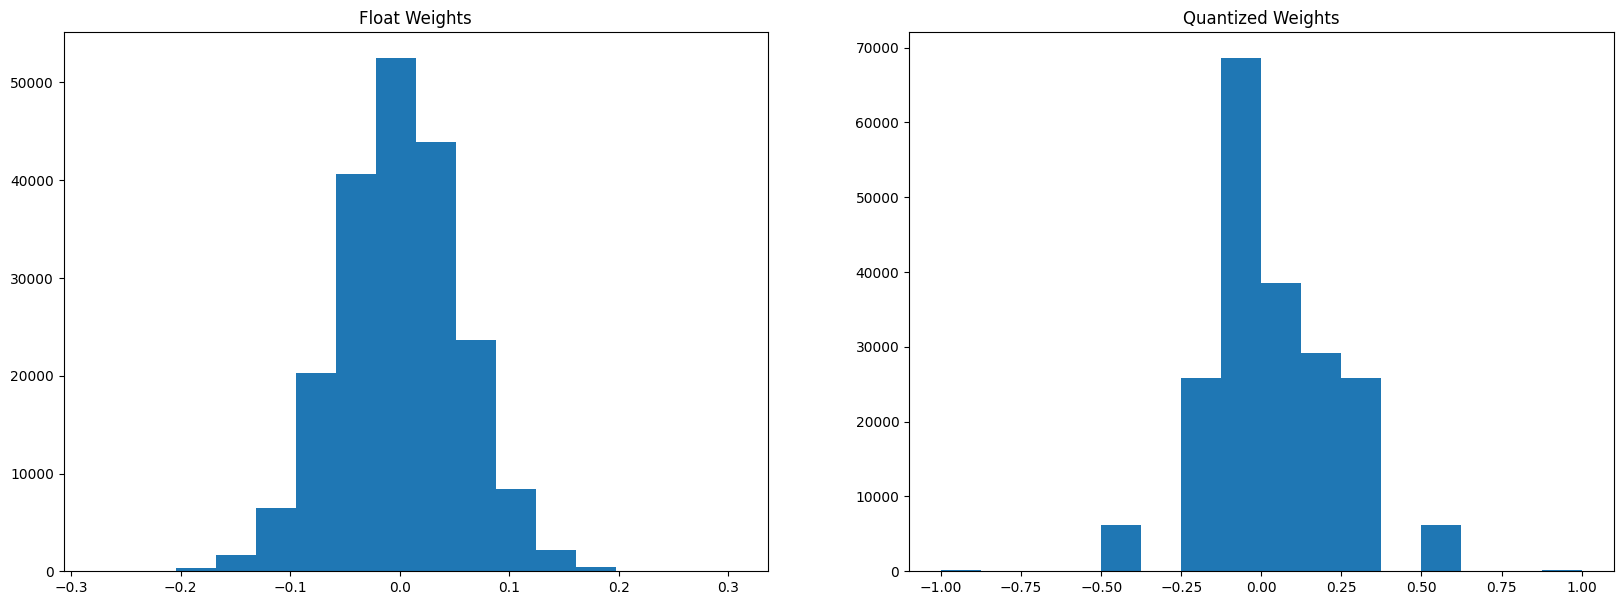

(1000, 256)
0.42687259234532265


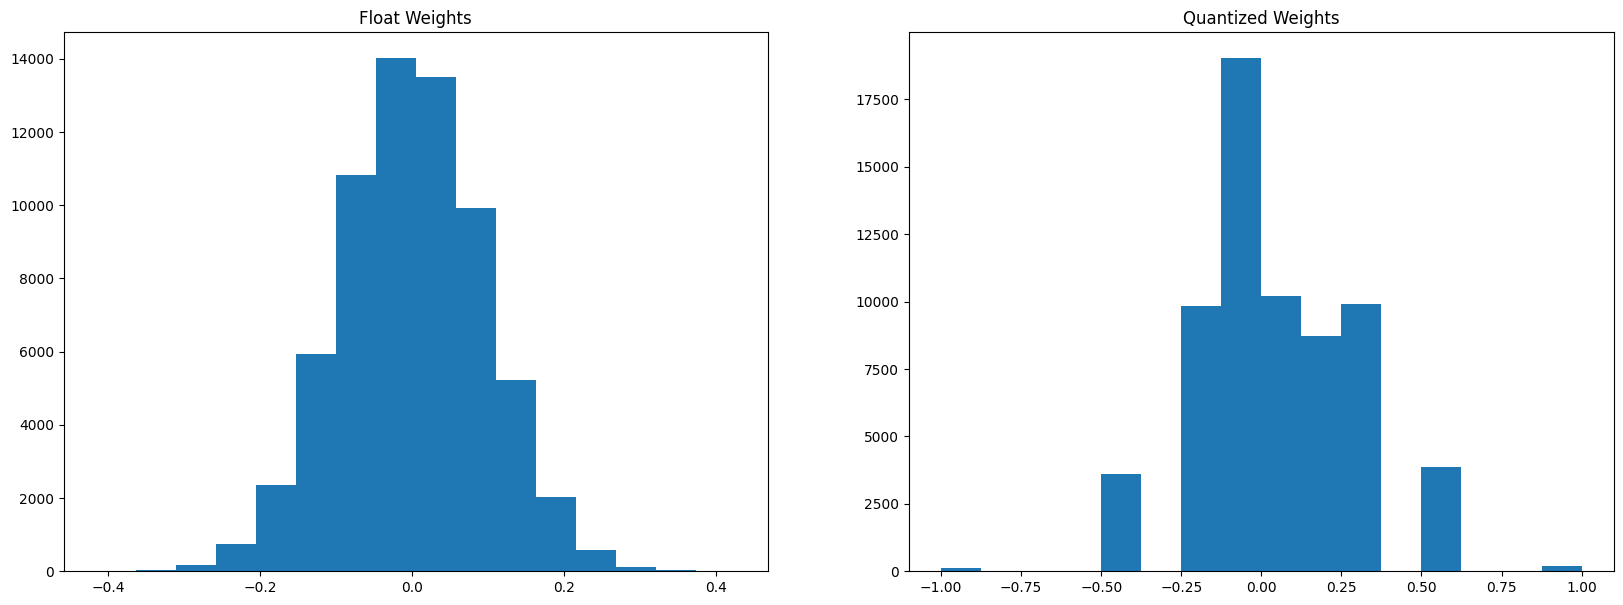

(1000, 10)
0.6216869393472295


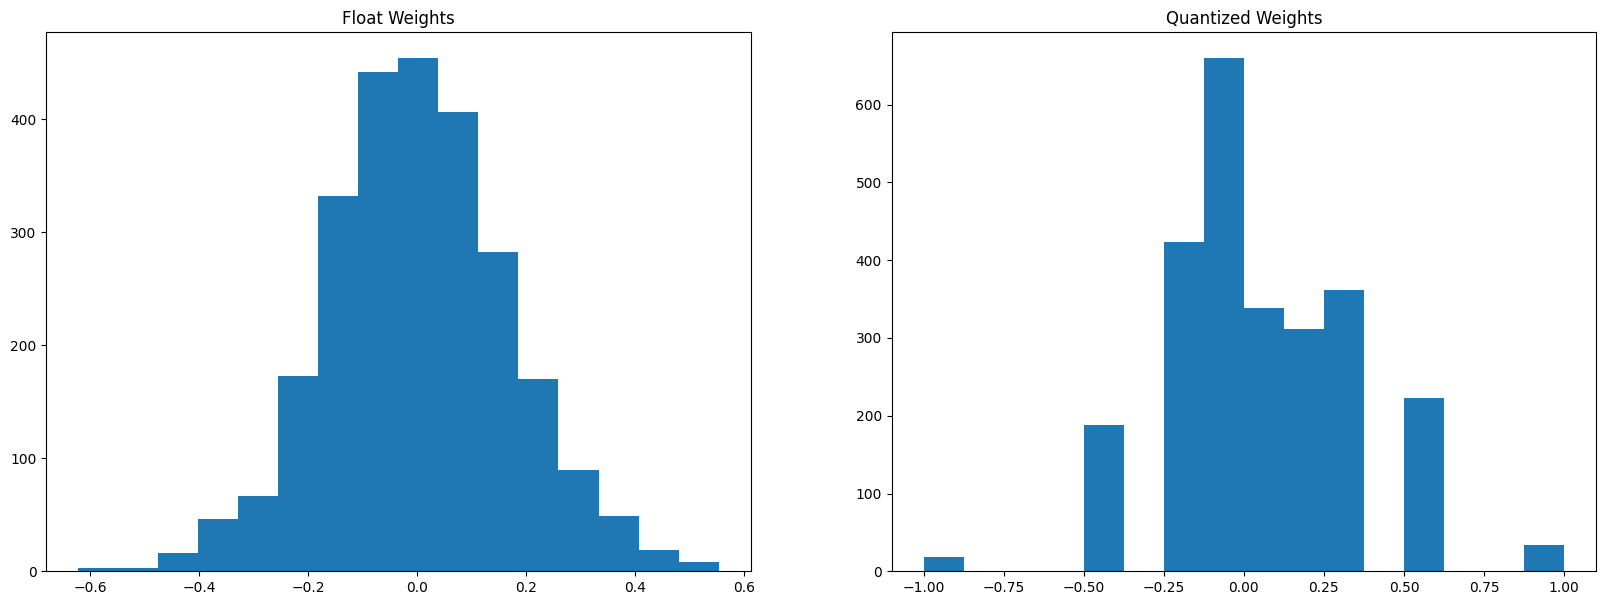

In [13]:
import matplotlib.pyplot as plt
from quantizer import quantize
import copy 
## printing weight distribution


for layer in neural_network_with_scale.layers:
    if isinstance(layer, FullyConnectedLayer.QFullyConnectedLayerWithScale):
        w = copy.deepcopy(layer.weights)
        b = copy.deepcopy(layer.biases)
        o = copy.deepcopy(layer.output)
        
        
        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(1, 3, figsize=(20,7))
        
        # For Sine Function
        axis[0].hist(np.ravel(w), bins=16)
        axis[0].set_title("Float Weights")
        
        scale = np.max(np.abs(w))
        print(scale)

        w /= scale
        w = quantize(w, True)

        axis[1].hist(np.ravel(w), bins=16)
        axis[1].set_title("Quantized Weights")
        
        axis[2].hist(np.ravel(o), bins=16)
        axis[2].set_title("float outputs")

        plt.show()